<a href="https://colab.research.google.com/github/HeshanNavindu-7/Pneumonia-Detection/blob/main/pneumonia_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od

In [5]:
od.download("https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: heshannavindu
Your Kaggle Key: ··········


100%|██████████| 1.17G/1.17G [00:13<00:00, 94.6MB/s]


**//explore the dataset**

In [6]:
import os
import matplotlib.pyplot as plt
import cv2

In [7]:
#define directry
root_di="/content/labeled-chest-xray-images"

train Data
Displaying 4 samples from 'NORMAL' class:


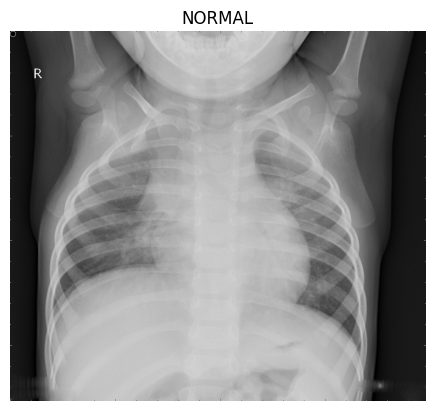

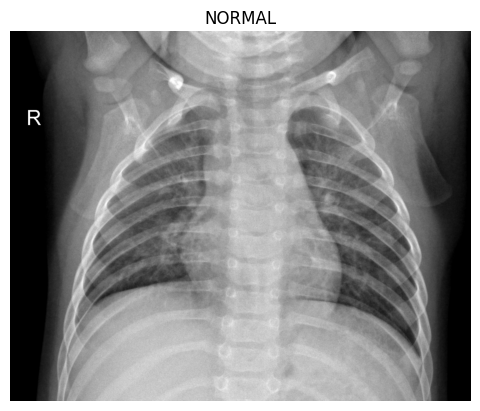

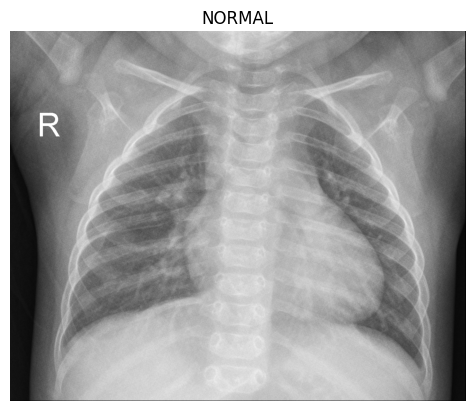

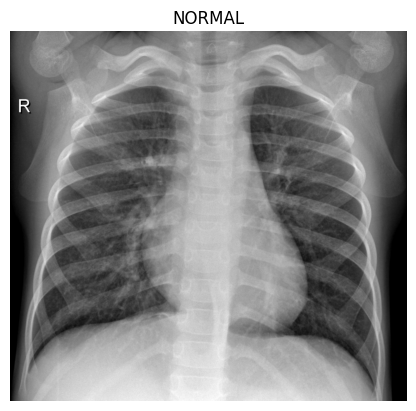

Displaying 4 samples from 'PNEUMONIA' class:


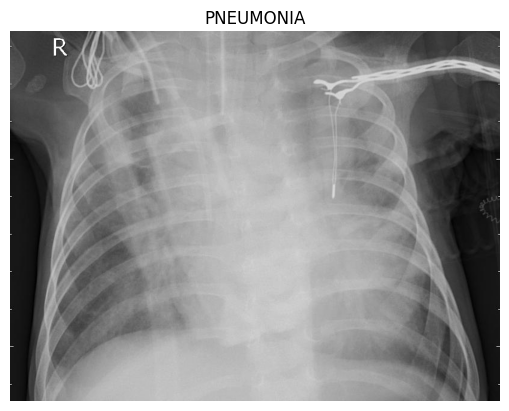

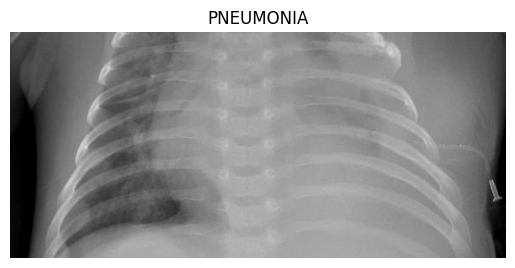

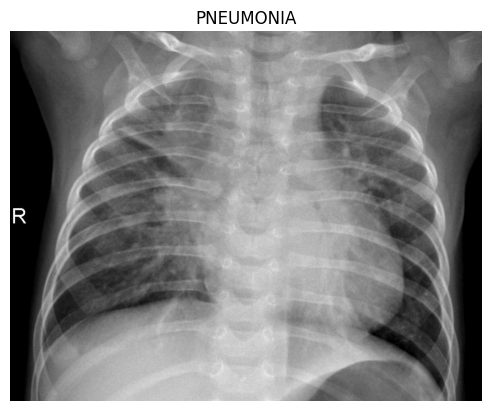

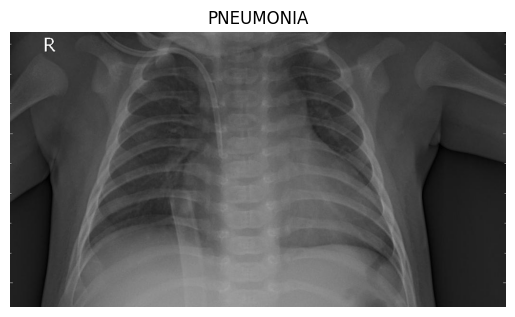

test Data
Displaying 4 samples from 'NORMAL' class:


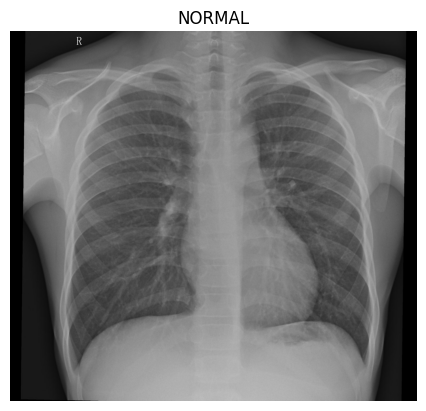

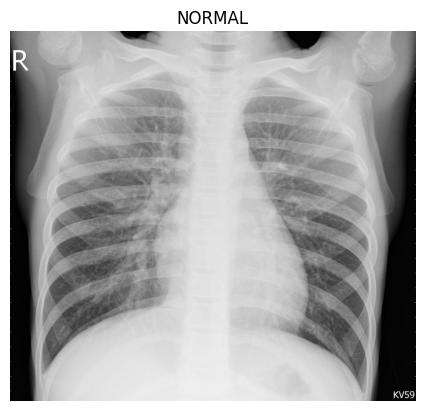

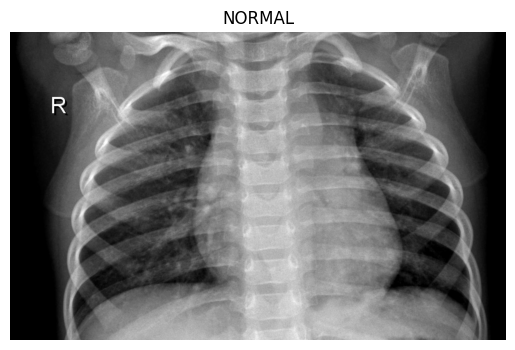

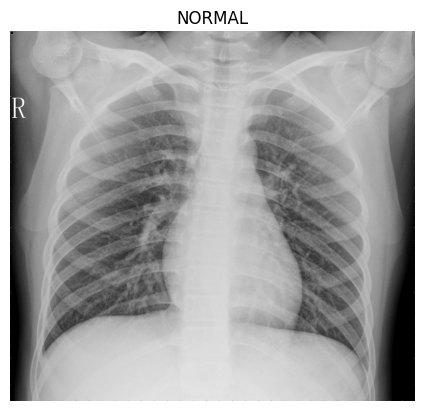

Displaying 4 samples from 'PNEUMONIA' class:


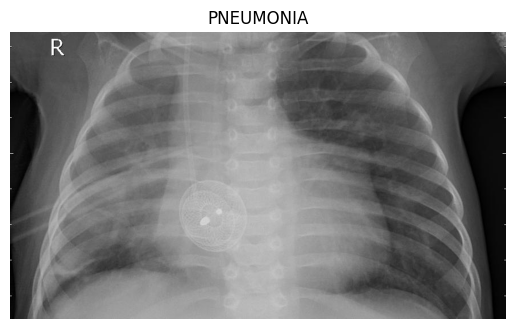

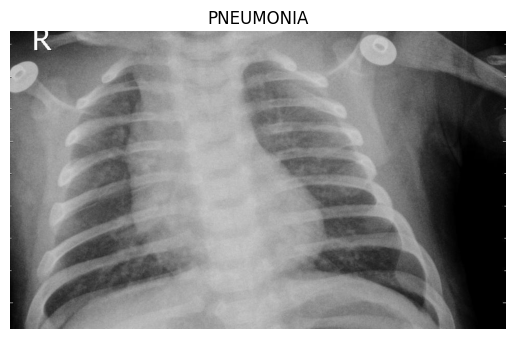

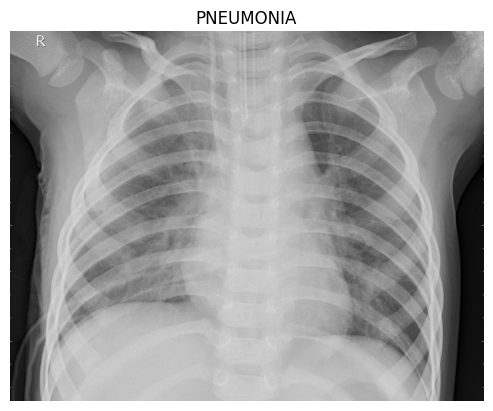

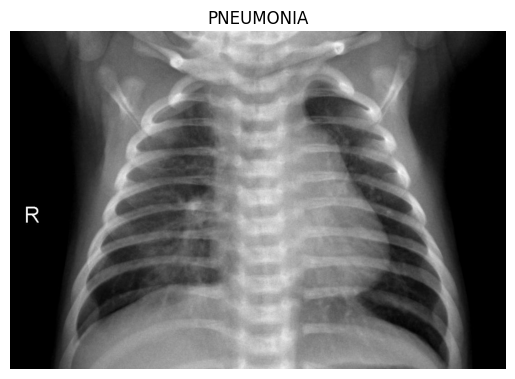

In [8]:
#define sub dir to train and test
train_dir='/content/labeled-chest-xray-images/chest_xray/train'
test_dir='/content/labeled-chest-xray-images/chest_xray/test'

# Define classes
classes =['NORMAL', 'PNEUMONIA']
#Display sample data
def display_sample(directory,num_samples=4):
  for class_name in classes:
    class_dir=os.path.join(directory,class_name)
    print(f"Displaying {num_samples} samples from '{class_name}' class:")

    for i, filename in enumerate(os.listdir(class_dir)):
            if i >= num_samples:
                break
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')
            plt.show()
print("train Data")
display_sample(train_dir)
print("test Data")
display_sample(test_dir)

In [9]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define subdirectories for train and test sets
train_dir = '/content/labeled-chest-xray-images/chest_xray/train'
test_dir = '/content/labeled-chest-xray-images/chest_xray/test'

# Define classes
classes = ['NORMAL', 'PNEUMONIA']

# Define image size and batch size
target_size = (150, 150)
batch_size = 32

# Define a generator for preprocessing and augmenting training images

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    shear_range=0.1
)

# Define a generator for preprocessing validation and testing images
test_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

# Create a generator for loading and preprocessing training images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Use training subset
)

# Create a generator for loading and preprocessing validation images
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Use validation subset
)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [10]:
#building th deep learning model
#build model arachitecture
import tensorflow as tf
from tensorflow.keras import layers, models

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),  # Adjust the number of units in this dense layer
    Dense(1, activation='sigmoid')
])


In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [15]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 1.0 MB/s eta 0:00:00


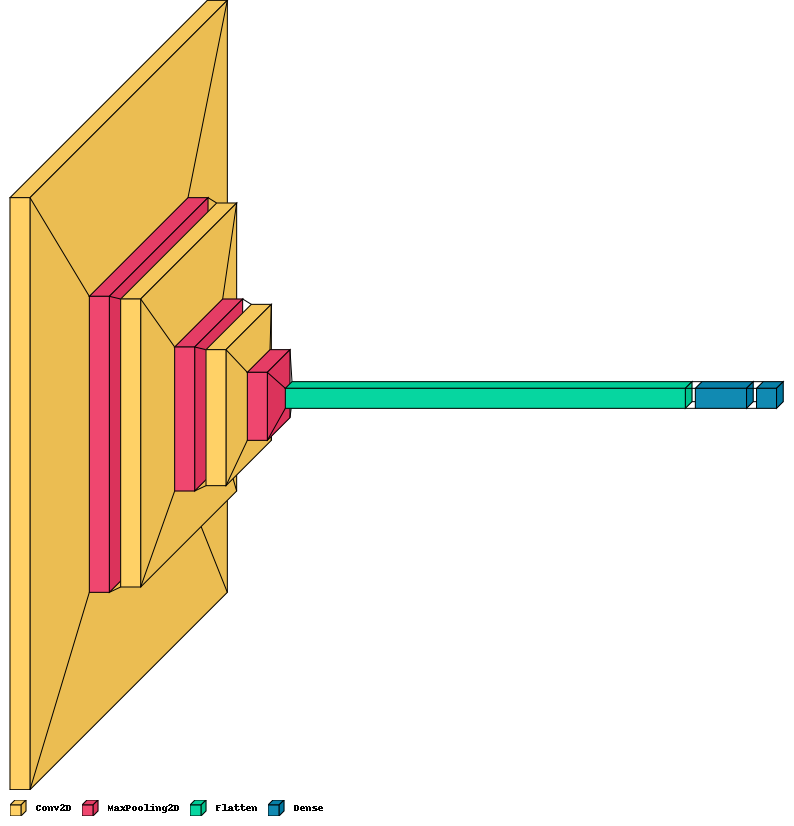

In [16]:
import visualkeras
visualkeras.layered_view(model, legend=True)

In [12]:


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/10
130/130 [==============================] - 280s 2s/step - loss: 0.4956 - accuracy: 0.7788 - val_loss: 0.2131 - val_accuracy: 0.9209
Epoch 2/10
130/130 [==============================] - 299s 2s/step - loss: 0.2732 - accuracy: 0.8838 - val_loss: 0.1681 - val_accuracy: 0.9404
Epoch 3/10
130/130 [==============================] - 290s 2s/step - loss: 0.2296 - accuracy: 0.9081 - val_loss: 0.1572 - val_accuracy: 0.9443
Epoch 4/10
130/130 [==============================] - 297s 2s/step - loss: 0.1973 - accuracy: 0.9259 - val_loss: 0.1432 - val_accuracy: 0.9414
Epoch 5/10
130/130 [==============================] - 292s 2s/step - loss: 0.1761 - accuracy: 0.9276 - val_loss: 0.1538 - val_accuracy: 0.9365
Epoch 6/10
130/130 [==============================] - 293s 2s/step - loss: 0.1718 - accuracy: 0.9319 - val_loss: 0.1632 - val_accuracy: 0.9365
Epoch 7/10
130/130 [==============================] - 277s 2s/step - loss: 0.1666 - accuracy: 0.9357 - val_loss: 0.1217 - val_accuracy: 0.9531

In [ ]:
visualkeras.layered_view(model, legend=True)

In [ ]:
# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=batch_size,
    class_mode='binary'  # Since it's a binary classification task
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Found 624 images belonging to 2 classes.
20/20 [==============================] - 15s 764ms/step - loss: 0.2595 - accuracy: 0.8926
Test Loss: 0.25954514741897583
Test Accuracy: 0.8926281929016113


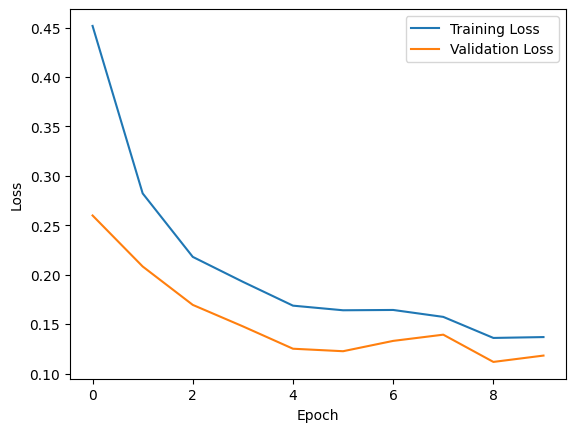

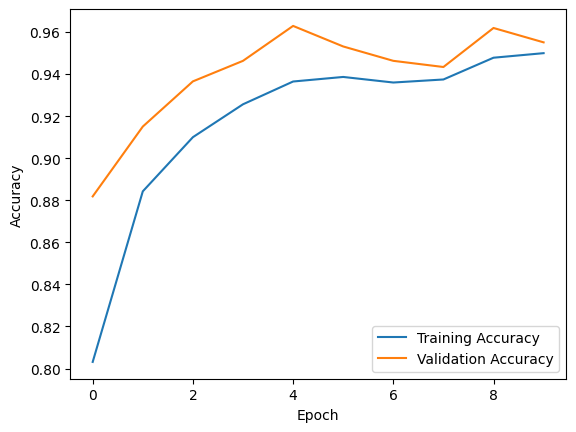

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.save('chest_xray_detection_model.h5')  # Save the model


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions for the test dataset
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

# Get true labels from the test generator
test_generator.reset()  # Reset the generator to start from the beginning
y_true = []
for i in range(test_generator.samples // batch_size):
    _, labels = next(test_generator)
    y_true.extend(np.argmax(labels, axis=1))

# Calculate additional evaluation metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Print additional evaluation metrics
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions for the test dataset
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

# Get true labels from the test generator
test_generator.reset()  # Reset the generator to start from the beginning
y_true = []
for i in range(test_generator.samples // batch_size):
    _, labels = next(test_generator)
    y_true.extend(np.argmax(labels, axis=1))

# Calculate additional evaluation metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Print additional evaluation metrics
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)


20/20 [==============================] - 28s 1s/step - loss: 0.2595 - accuracy: 0.8926
Test Loss: 0.25954514741897583
Test Accuracy: 0.8926281929016113
20/20 [==============================] - 16s 759ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image  # Import from tensorflow.keras instead of keras

# Function to preprocess a single image for prediction
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))  # Load image and resize to match model input size
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values
    return img_array

# Function to make predictions on a single image
def predict_single_image(model, image_path):
    # Preprocess the image
    img_array = preprocess_image(image_path)
    # Make prediction
    prediction = model.predict(img_array)
    return prediction

# Function to display prediction result
def display_prediction(prediction):
    if prediction[0][0] > 0.5:
        print("Prediction: PNEUMONIA")
    else:
        print("Prediction: NORMAL")

#  usage:

image_path = '/content/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-6840343-0001.jpeg'  # Example image path
prediction = predict_single_image(model, image_path)
display_prediction(prediction)


1/1 [==============================] - 0s 61ms/step
Prediction: PNEUMONIA
